In [25]:
import splusdata
import astropy

from astropy.wcs import WCS
from astropy.nddata import Cutout2D

from astropy import units as u

from astropy.coordinates import SkyCoord
from astropy.io import fits

import matplotlib.pyplot as plt

In [3]:
conn = splusdata.connect('gustavo', 'asdflkjh')

You have access to internal data


In [42]:
f = conn.get_field('STRIPE82-0003', 'R')

In [44]:
wcs = WCS(f[1].header)

In [45]:
wcs.pixel_to_world(4680, 7080)

<SkyCoord (ICRS): (ra, dec) in deg
    (1.542527, -0.45853506)>

In [58]:
def cut(field, ra, dec, size=1000):
    wcs = WCS(f[1].header)
    pos = SkyCoord(ra*u.deg,dec*u.deg)
    d = Cutout2D(f[1].data, pos, [size, size], wcs)
    nfits = fits.PrimaryHDU(data=d.data, header=d.wcs.to_header())
    
    colored_im = conn.twelve_band_img(ra,dec, size)
    return nfits, colored_im

In [59]:
im, color = cut(f, 1.542527, -0.45853506, 300)

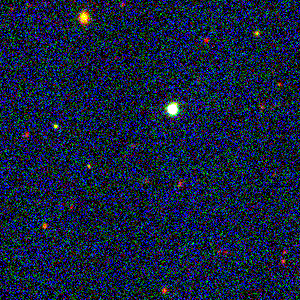

In [60]:
color